**transfer learning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not


/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not


In [ ]:
import os

# Chemin du dossier principal
main_directory = '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not'

# Liste des dossiers à créer
folders = ['train', 'val', 'test']

# Création des dossiers
for folder in folders:
    path = os.path.join(main_directory, folder)
    os.makedirs(path, exist_ok=True)
    print(f"Dossier '{folder}' créé avec succès dans '{main_directory}'")


Dossier 'train' créé avec succès dans '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not'
Dossier 'val' créé avec succès dans '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not'
Dossier 'test' créé avec succès dans '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not'


In [ ]:
main_directory = '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not'
# Liste des dossiers à créer
folders = ['train', 'val', 'test']
folders2 = ['fake', 'real']
for folder in folders:
  for folderr in folders2:
    path = os.path.join(main_directory,folder, folderr)
    os.makedirs(path, exist_ok=True)
    print(f"Dossier '{folderr}' créé avec succès dans '{folder}'")

Dossier 'fake' créé avec succès dans 'train'
Dossier 'real' créé avec succès dans 'train'
Dossier 'fake' créé avec succès dans 'val'
Dossier 'real' créé avec succès dans 'val'
Dossier 'fake' créé avec succès dans 'test'
Dossier 'real' créé avec succès dans 'test'


In [ ]:
import os
import shutil
import random

# Chemins des dossiers source et destination
source_folder = '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/fake'
destination_folder = '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/test/fake'

# Liste des fichiers dans le dossier source
files = os.listdir(source_folder)

# Calcul du nombre de fichiers à déplacer (80%)
num_files_to_move = int(len(files) * 1)

# Sélection aléatoire des fichiers à déplacer
files_to_move = random.sample(files, num_files_to_move)

# Déplacement des fichiers sélectionnés vers le dossier destination
for file_name in files_to_move:
    source_path = os.path.join(source_folder, file_name)
    destination_path = os.path.join(destination_folder, file_name)
    shutil.move(source_path, destination_path)
    print(f"Fichier '{file_name}' déplacé avec succès vers '{destination_folder}'")


Fichier 'image_7806867660484736198.png' déplacé avec succès vers '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/test/fake'
Fichier 'image_746662487709051041.png' déplacé avec succès vers '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/test/fake'
Fichier 'image_5174282572986915244.png' déplacé avec succès vers '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/test/fake'
Fichier 'image_5414309929870508901.png' déplacé avec succès vers '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/test/fake'
Fichier 'image_1459530581494650371.png' déplacé avec succès vers '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/test/fake'
Fichier 'image_3169426544133938670.png' déplacé avec succès vers '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/test/fake'
Fichier 'image_6220768242797136165.png' déplacé avec succès vers '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/test/fake'
Fichier 'image

In [ ]:
# Liste des fichiers dans le dossier source
files = os.listdir('/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/test/real')

# Calcul du nombre de fichiers à déplacer (80%)
print(len(files))

171


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_img_path = '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/train'
test_img_path = '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/val'

In [ ]:
w,h = 224,224
batch_size = 32

train_data_gen = ImageDataGenerator(
    rescale=1.0/255,
)
test_data_gen = ImageDataGenerator(rescale = 1.0/255)

train_Dataset = train_data_gen.flow_from_directory(
    train_img_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_Dataset = test_data_gen.flow_from_directory(
    test_img_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = False
)
test_Dataset.class_indices

Found 2427 images belonging to 2 classes.
Found 303 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [ ]:
test_Dataset.image_shape

(224, 224, 3)

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers
# Load the MobileNetV2 model with pre-trained weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Use a valid input shape

# Create a new model by adding your custom top layers for binary classification
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Freeze the weights of the MobileNetV2 layers (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 22327585 (85.17 MB)
Trainable params: 524801 (2.00 MB)
Non-trainable params: 21802784 (83.17 MB)
_________

In [ ]:
model.fit(train_Dataset, epochs=7, validation_data=test_Dataset)

Epoch 1/7
76/76 [==============================] - 59s 768ms/step - loss: 0.1178 - accuracy: 0.9625 - val_loss: 0.0884 - val_accuracy: 0.9736
Epoch 2/7
76/76 [==============================] - 57s 753ms/step - loss: 0.1071 - accuracy: 0.9650 - val_loss: 0.0755 - val_accuracy: 0.9703
Epoch 3/7
76/76 [==============================] - 59s 774ms/step - loss: 0.0873 - accuracy: 0.9732 - val_loss: 0.0682 - val_accuracy: 0.9802
Epoch 4/7
76/76 [==============================] - 58s 763ms/step - loss: 0.0697 - accuracy: 0.9802 - val_loss: 0.0659 - val_accuracy: 0.9868
Epoch 5/7
76/76 [==============================] - 61s 809ms/step - loss: 0.0659 - accuracy: 0.9802 - val_loss: 0.0565 - val_accuracy: 0.9868
Epoch 6/7
76/76 [==============================] - 57s 756ms/step - loss: 0.0624 - accuracy: 0.9802 - val_loss: 0.0567 - val_accuracy: 0.9868
Epoch 7/7
76/76 [==============================] - 59s 784ms/step - loss: 0.0519 - accuracy: 0.9823 - val_loss: 0.0514 - val_accuracy: 0.9868


In [ ]:
model.save('/content/drive/MyDrive/car_damage_detection/AI_or_Not/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 28ms/step
[[0.19433166]]


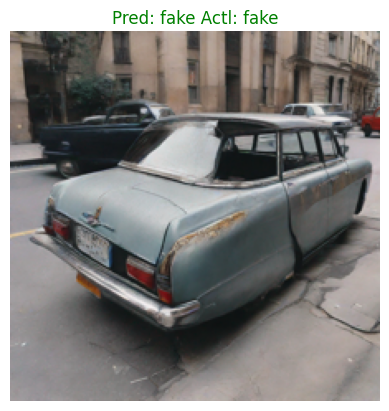

1/1 [==============================] - 0s 35ms/step
[[0.02369769]]


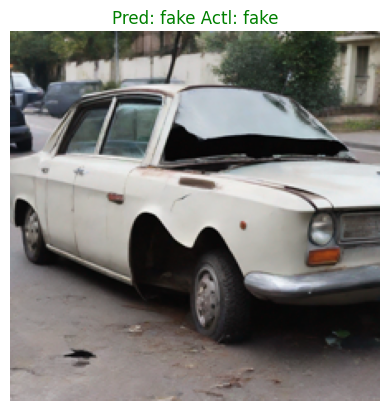

1/1 [==============================] - 0s 30ms/step
[[0.10188511]]


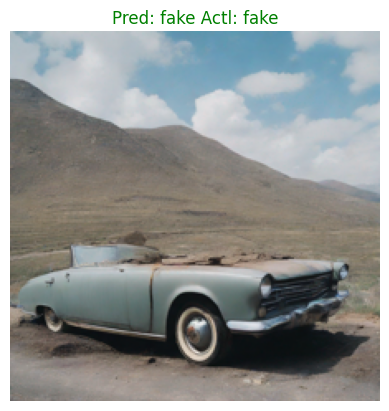

1/1 [==============================] - 0s 27ms/step
[[0.01098685]]


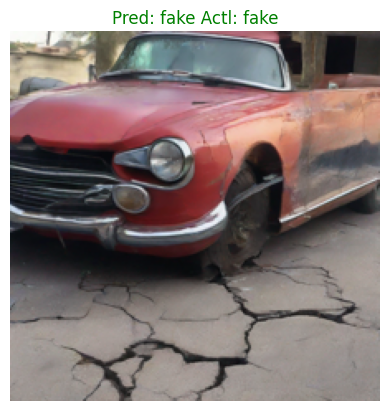

1/1 [==============================] - 0s 29ms/step
[[0.0409107]]


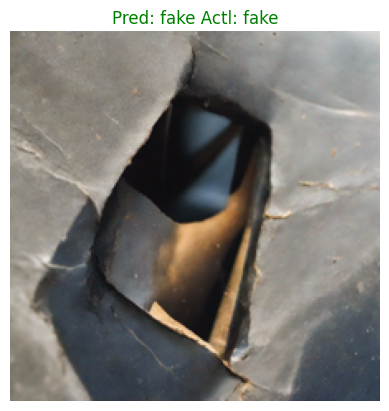

1/1 [==============================] - 0s 28ms/step
[[0.02646712]]


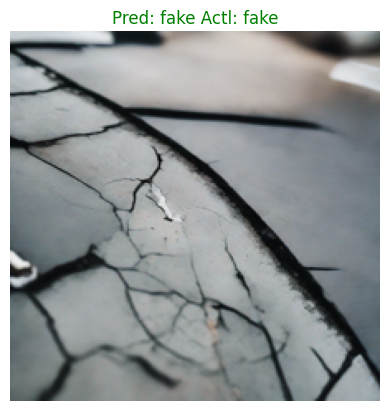

1/1 [==============================] - 0s 28ms/step
[[0.39209715]]


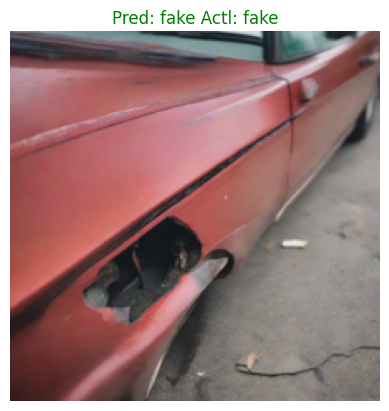

1/1 [==============================] - 0s 29ms/step
[[0.7830251]]


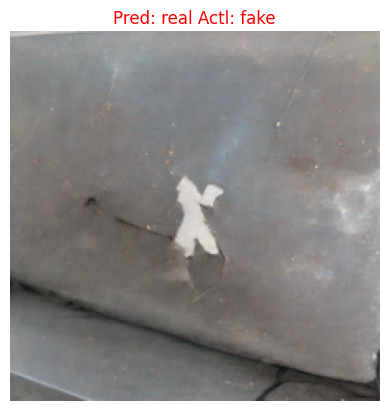

1/1 [==============================] - 0s 27ms/step
[[0.6880678]]


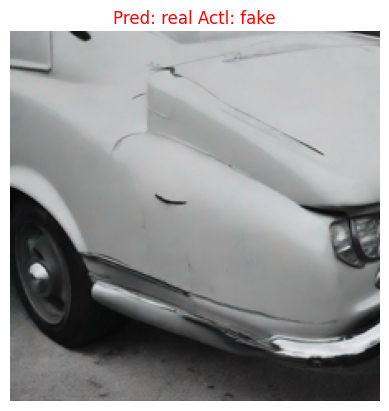

1/1 [==============================] - 0s 30ms/step
[[0.01231839]]


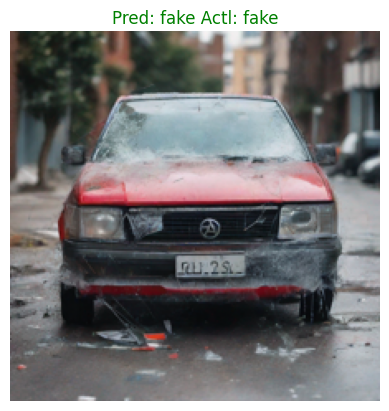

1/1 [==============================] - 0s 26ms/step
[[0.1082935]]


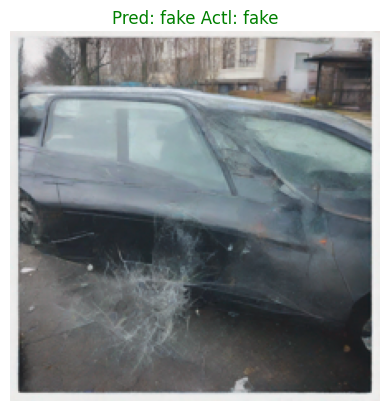

1/1 [==============================] - 0s 34ms/step
[[0.9894159]]


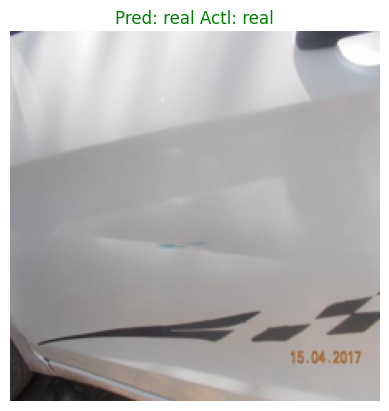

1/1 [==============================] - 0s 46ms/step
[[0.9028434]]


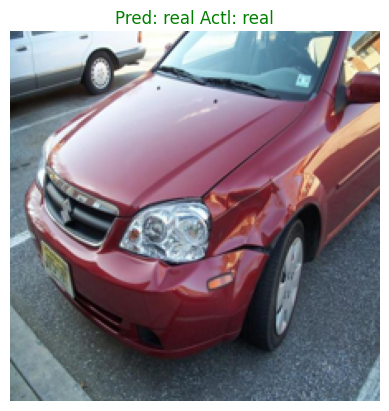

1/1 [==============================] - 0s 30ms/step
[[0.99974304]]


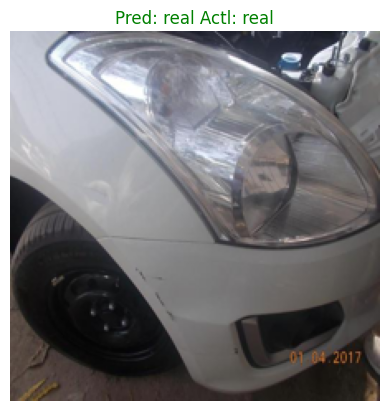

1/1 [==============================] - 0s 29ms/step
[[0.9951273]]


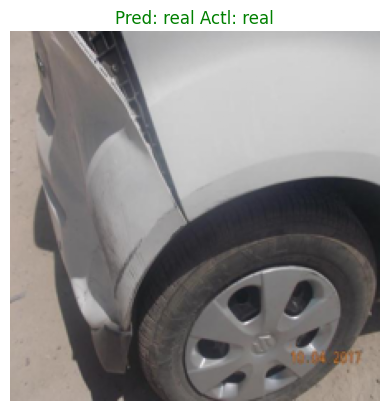

1/1 [==============================] - 0s 57ms/step
[[0.99746716]]


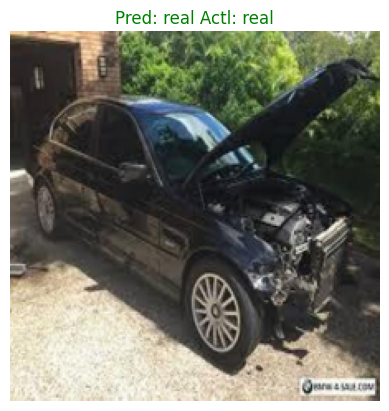

1/1 [==============================] - 0s 66ms/step
[[0.99652797]]


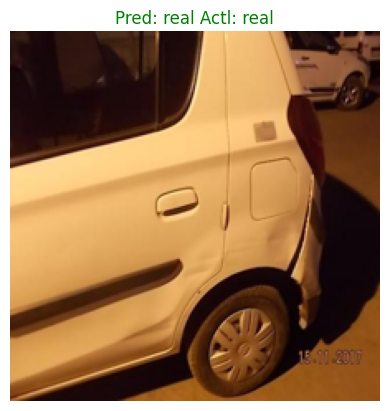

1/1 [==============================] - 0s 61ms/step
[[0.9999263]]


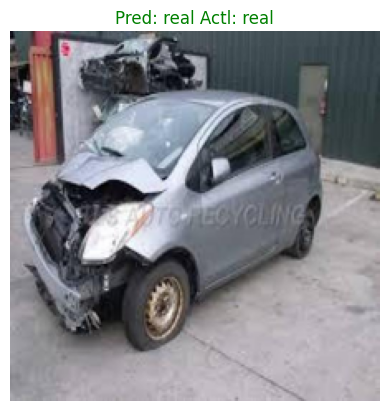

1/1 [==============================] - 0s 76ms/step
[[0.9988501]]


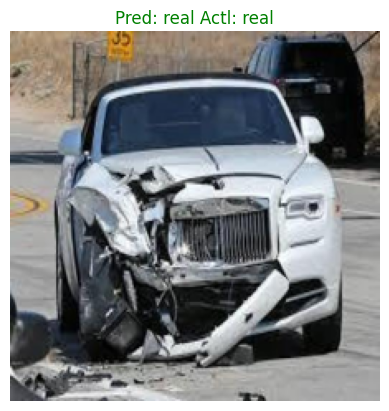

1/1 [==============================] - 0s 43ms/step
[[0.9984914]]


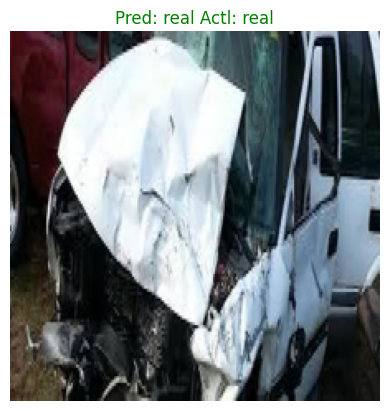

1/1 [==============================] - 0s 43ms/step
[[0.9987244]]


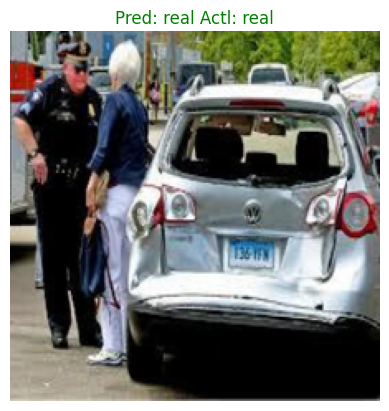

1/1 [==============================] - 0s 44ms/step
[[0.9953454]]


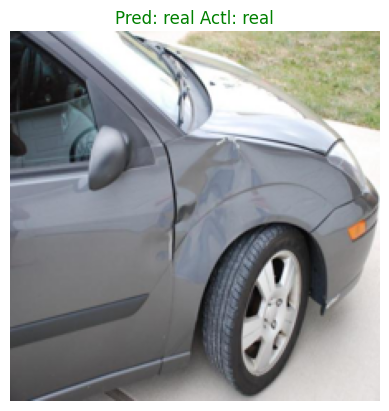

False: 2
True: 20


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
val_dir = '/content/drive/MyDrive/car_damage_detection/AI_or_Not/Ai_Or_Not/test'
class_names = ["fake", "real"]

image_paths = []
for class_name in class_names:

    folder_path = os.path.join(val_dir, class_name)
    iter=0
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_paths.append(os.path.join(folder_path, filename))
            iter+=1
            if iter> 10:
              break
negative = 0
positive = 0
for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path)
    img = img.resize((224, 224))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img)
    if pred < 0.5:
        pred_label = class_names[0]
    else:
        pred_label = class_names[1]



    folder_name = os.path.basename(os.path.dirname(image_path))
    plt.imshow(img[0])
    print(pred)
    if (pred_label != folder_name):
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'red')
        negative+=1
    else:
        plt.title('Pred: ' + pred_label + ' Actl: ' + folder_name, color = 'green')
        positive+=1

    plt.axis('off')
    plt.show()
print('False: '+ str(negative) + '\nTrue: ' + str(positive))

**CNN**

In [ ]:
batch_size = 48
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_img_path,
    label_mode="binary",
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_img_path,
    label_mode="binary",
    seed=123,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2427 files belonging to 2 classes.
Using 1942 files for training.
Found 2427 files belonging to 2 classes.
Using 485 files for validation.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_img_path,
  label_mode="binary",
  seed=321,
  image_size=(img_height, img_width),
  batch_size=batch_size)


class_names = train_ds.class_names
print(class_names)

Found 303 files belonging to 2 classes.
['fake', 'real']


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    #layers.RandomRotation(0.01),
    layers.RandomZoom(0.1),
  ])
rescale = tf.keras.Sequential([
  layers.Rescaling(1./255)
])

In [ ]:
from tensorflow.keras import Sequential

model2 = Sequential([
  data_augmentation,
  rescale,
  layers.Conv2D(120, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(250, 3, padding='same', activation='relu'),
  layers.Conv2D(250, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(250, 3, padding='same', activation='relu'),
  layers.Conv2D(250, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(250, 3, padding='same', activation='relu'),
  layers.Conv2D(250, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(500, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
  layers.Dense(500, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
  layers.Dense(1, activation='sigmoid')
])
opt = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(opt,
              #loss=tf.keras.losses.BinaryCrossentropy(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

#callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 120)     3360      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 120)     480       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 120)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 250)    

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)
check_point = tf.keras.callbacks.ModelCheckpoint('model_{}.h5'.format('12'),
                                                 monitor='accuracy',
                                                 save_best_only=True)

In [ ]:
epochs = 20
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[early_stop, check_point]#, callback]
)

Epoch 1/20
41/41 [==============================] - ETA: 0s - loss: 0.3712 - accuracy: 0.8450

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 547s 10s/step - loss: 0.3712 - accuracy: 0.8450 - val_loss: 0.6851 - val_accuracy: 0.5670
Epoch 2/20
41/41 [==============================] - 59s 1s/step - loss: 0.1584 - accuracy: 0.9413 - val_loss: 0.6911 - val_accuracy: 0.5670
Epoch 3/20
41/41 [==============================] - 58s 1s/step - loss: 0.0842 - accuracy: 0.9732 - val_loss: 0.7452 - val_accuracy: 0.5670
Epoch 4/20
41/41 [==============================] - 58s 1s/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 1.1948 - val_accuracy: 0.5670
Epoch 5/20
41/41 [==============================] - 50s 1s/step - loss: 0.0519 - accuracy: 0.9820 - val_loss: 0.9914 - val_accuracy: 0.5670
Epoch 6/20
41/41 [==============================] - 54s 1s/step - loss: 0.0453 - accuracy: 0.9840 - val_loss: 1.2291 - val_accuracy: 0.5670
Epoch 7/20
41/41 [==============================] - 50s 1s/step - loss: 0.0540 - accuracy: 0.9815 - val_loss: 0.9139 - val_accuracy: 0.5608
Epoch 8/20
41/41 [===========

In [ ]:
model2.save('/content/drive/MyDrive/car_damage_detection/AI_or_Not/model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


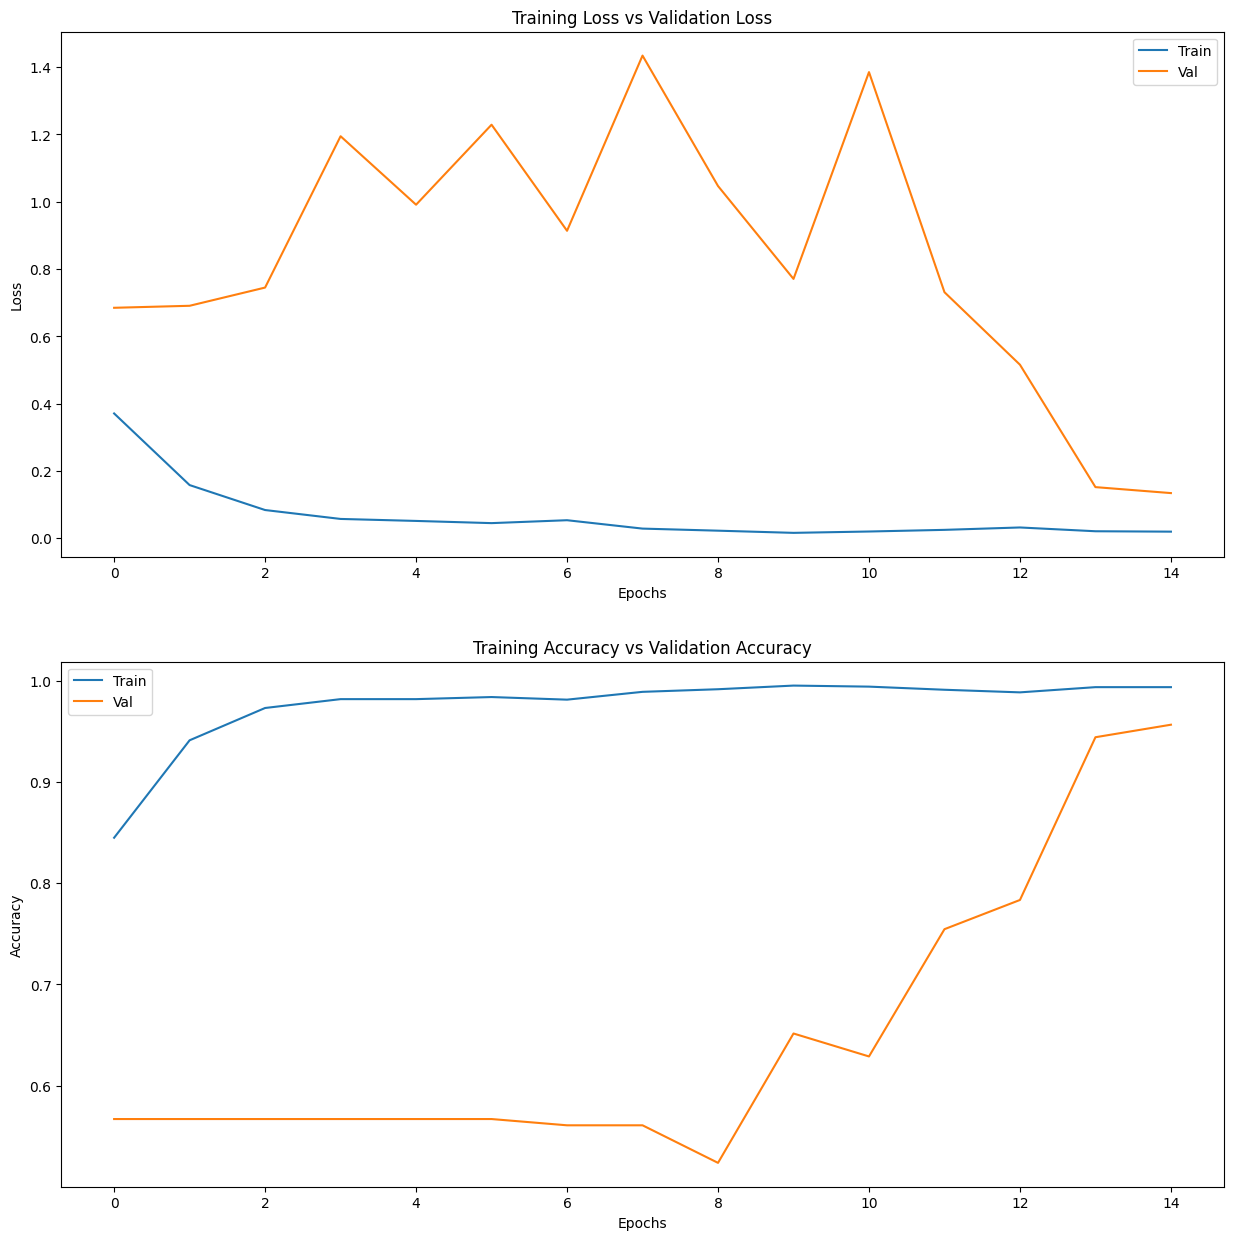

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
axs[0].plot(history2.history['loss'])
axs[0].plot(history2.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history2.history['accuracy'])
axs[1].plot(history2.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

plt.show()

RESNET 50

In [ ]:
from tensorflow.keras.models import Model
# Charger ResNet-50 pré-entraîné avec ses poids ImageNet
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congeler les couches de ResNet-50 pour les rendre non-entraînables
for layer in resnet.layers:
    layer.trainable = False

# Ajouter des couches personnalisées au-dessus de ResNet-50 pour la classification
x = Flatten()(resnet.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Créer le modèle final
model3 = Model(inputs=resnet.input, outputs=predictions)

# Compiler le modèle
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_Dataset, epochs=7, validation_data=test_Dataset)

Epoch 1/7
76/76 [==============================] - 2428s 32s/step - loss: 1.2143 - accuracy: 0.7021 - val_loss: 0.4884 - val_accuracy: 0.7921
Epoch 2/7
76/76 [==============================] - 67s 886ms/step - loss: 0.3224 - accuracy: 0.8583 - val_loss: 0.3423 - val_accuracy: 0.8581
Epoch 3/7
76/76 [==============================] - 68s 887ms/step - loss: 0.3055 - accuracy: 0.8661 - val_loss: 0.5580 - val_accuracy: 0.7558
Epoch 4/7
76/76 [==============================] - 67s 885ms/step - loss: 0.3072 - accuracy: 0.8686 - val_loss: 0.5258 - val_accuracy: 0.8086
Epoch 5/7
76/76 [==============================] - 71s 931ms/step - loss: 0.2807 - accuracy: 0.8842 - val_loss: 0.3558 - val_accuracy: 0.8515
Epoch 6/7
76/76 [==============================] - 69s 914ms/step - loss: 0.2456 - accuracy: 0.8970 - val_loss: 0.3549 - val_accuracy: 0.8581
Epoch 7/7
76/76 [==============================] - 70s 926ms/step - loss: 0.2469 - accuracy: 0.8999 - val_loss: 0.3242 - val_accuracy: 0.8548


In [ ]:
model.save('/content/drive/MyDrive/car_damage_detection/AI_or_Not/model3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


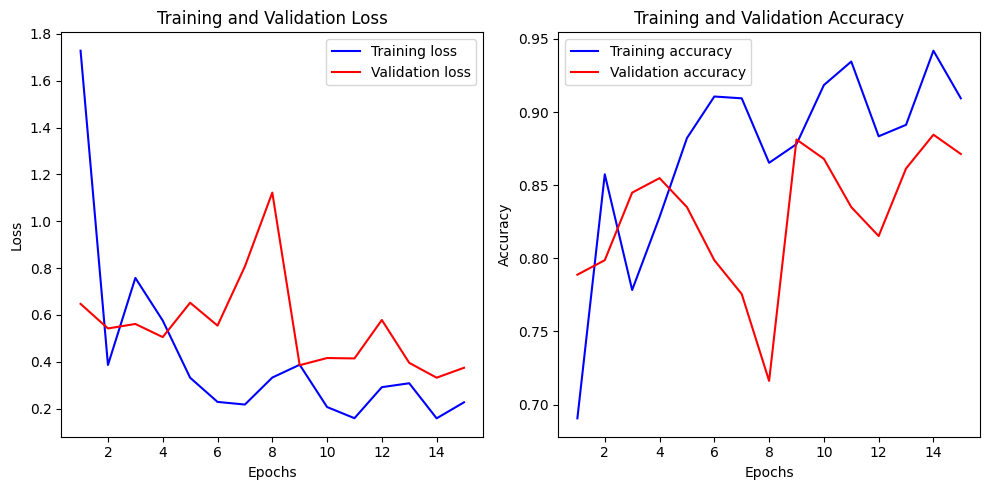

In [ ]:
import matplotlib.pyplot as plt

# Récupérer les données d'historique
train_loss = model3.history.history['loss']
val_loss = model3.history.history['val_loss']
train_accuracy = model3.history.history['accuracy']
val_accuracy = model3.history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Afficher les courbes de loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Afficher les courbes d'accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import load_model

# Path to your saved model
model_path = '/content/drive/MyDrive/car_damage_detection/AI_or_Not/model.h5'
model2_path= '/content/drive/MyDrive/car_damage_detection/AI_or_Not/model2.h5'
model3_path= '/content/drive/MyDrive/car_damage_detection/AI_or_Not/model3.h5'
# Load the model
model = load_model(model_path)
model2 = load_model(model2_path)
model3 = load_model(model2_path)

11/11 [==============================] - 8s 207ms/step
{'Accuracy': 0.4309278350515464, 'Precision': 0.18697282099343956, 'Recall': 0.4309278350515464, 'F1 Score': 0.26079206155857276, 'Confusion Matrix': array([[0.9952381, 0.0047619],
       [1.       , 0.       ]])}
11/11 [==============================] - 21s 388ms/step
{'Accuracy': 0.5195876288659794, 'Precision': 0.5236664023261962, 'Recall': 0.5195876288659794, 'F1 Score': 0.5211358479157185, 'Confusion Matrix': array([[0.48095238, 0.51904762],
       [0.45090909, 0.54909091]])}
11/11 [==============================] - 8s 256ms/step
{'Accuracy': 0.4824742268041237, 'Precision': 0.48671953476077184, 'Recall': 0.4824742268041237, 'F1 Score': 0.48414205075899275, 'Confusion Matrix': array([[0.43809524, 0.56190476],
       [0.48363636, 0.51636364]])}
             Accuracy  Precision    Recall  F1 Score  \
Inceptionv3  0.430928   0.186973  0.430928  0.260792   
CNN scratch  0.519588   0.523666  0.519588  0.521136   
Resnet 50    0.482

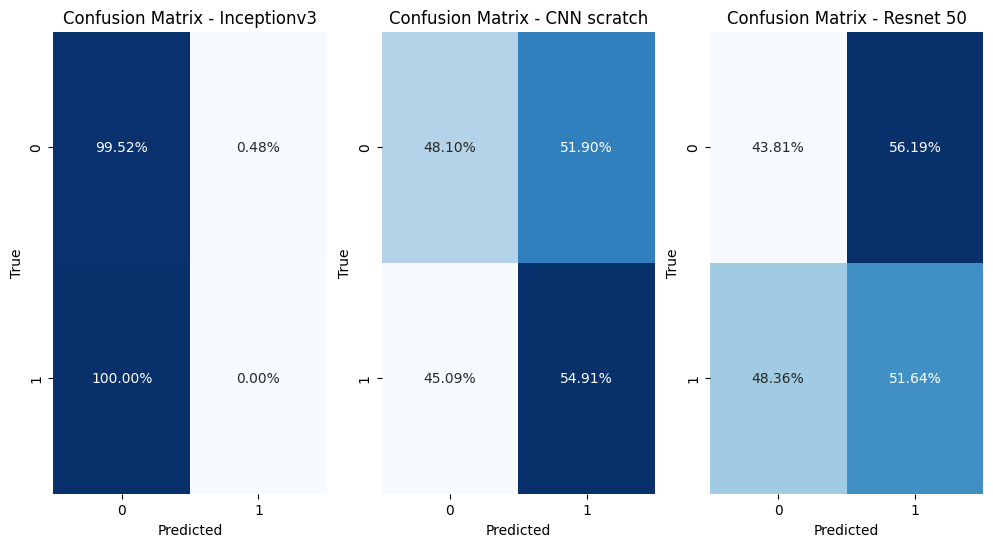

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

true_labels = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())

# Function to calculate precision, recall, f1-score, and accuracy
def calculate_metrics(k, test_ds, true_labels):
    y_pred = k.predict(test_ds)
    y_true = np.array(true_labels)
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred_binary, average='weighted')

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_binary)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Calculate percentages

    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm_percent  # Use cm_percent here instead of cm
    }
    return metrics

# Calculate metrics for each model
metrics_model = calculate_metrics(model, val_ds, true_labels)
print(metrics_model)
metrics_model2 = calculate_metrics(model2, val_ds, true_labels)
print(metrics_model2)
metrics_model3 = calculate_metrics(model3, val_ds, true_labels)
print(metrics_model3)

# Create a DataFrame
df = pd.DataFrame([metrics_model, metrics_model2, metrics_model3], index=['Inceptionv3', 'CNN scratch', 'Resnet 50'])

# Display the DataFrame
print(df)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
for i, (model, title) in enumerate(zip([model, model2, model3], ['Inceptionv3', 'CNN scratch', 'Resnet 50'])):
    plt.subplot(1, 3, i+1)
    sns.heatmap(df.loc[title]['Confusion Matrix'], annot=True, fmt=".2%", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.show()
